**Problema** : Riconoscere se il soggetto indossa una mascherina oppure non indossa nessuna protezione.

This Image classification with Bag of Visual Words technique has three steps:
* **Feature Extraction** :Determination of Image features of a given label.
* **Codebook Construction** : Construction of visual vocabulary by clustering, followed by frequency analysis.
* **Classification** Classification of images based on vocabulary generated using SVM.


Importo le librerie che mi servono

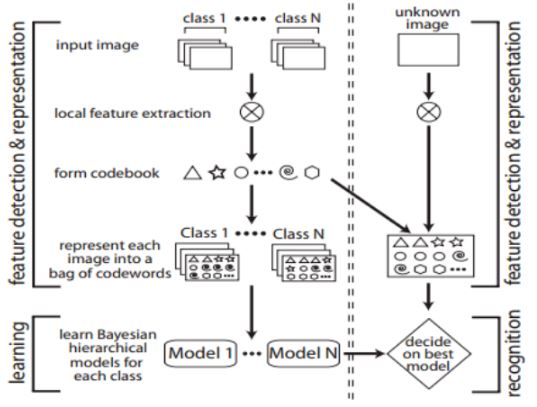

In [1]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix
import cv2
import os
import matplotlib.pyplot as plt
import random
import pylab as pl

In [2]:
train_path="archive/Face Mask Dataset/Train"
class_names=os.listdir(train_path)

In [3]:
print(class_names)

['WithMask', 'WithoutMask']


Creo due contenitori per il percoso delle immagini e la loro classe

In [4]:
image_paths=[]
image_classes=[]

Creare lista per tutti i filename nella directory

In [5]:
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [6]:
# ciclo for su ogni classe del training set
for training_name in class_names:
    #estraggo la directory delle classi
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)#class 'generator', itero sulla classe 
    image_paths+=class_path #vado a creare una lista della posizione di ogni immagine
    

len(image_paths)


    #in totale ho 10000 immagini di test, 5000 per ogni classe

10000

In [7]:
image_classes_0=[0]*(len(image_paths)//2)# creo label per ogni classe

In [8]:
print(image_classes_0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [9]:
image_classes_1=[1]*(len(image_paths)//2)# creo label per ogni classe

In [10]:
print(image_classes_1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [11]:
image_classes=image_classes_0+image_classes_1
len(image_classes)

10000

ora ad ogni immagine assegno l'etichetta:
* zero = withmask
* uno = withoutmask

In [12]:
D=[]
#la struttura D contiene il path dell'immagine con la sua corrispettiva etichetta
for i in range(len(image_paths)):
    D.append((image_paths[i],image_classes[i]))

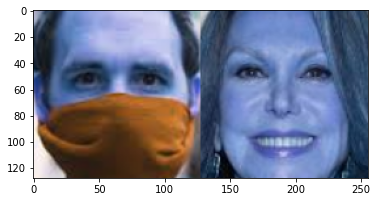

In [13]:
#visualizzo due esempi delle mie due classi 
import numpy as np
import matplotlib.pyplot as plt

img_A =  cv2.imread(D[50][0])
img_B =  cv2.imread(D[5000][0])

dim=(128,128)
img_A_2= cv2.resize(img_A,dim)
img_B_2= cv2.resize(img_B,dim)

plot_image = np.concatenate((img_A_2, img_B_2), axis=1)
plt.imshow(plot_image)

**Estrazione delle feature con BOW**

<class 'cv2.xfeatures2d_SIFT'>


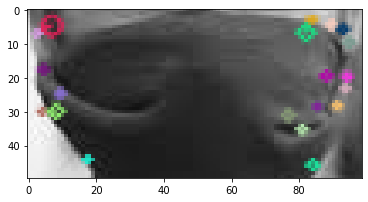

In [14]:
des_list=[] #lista per descrittori, la uso dopo
#calcolo che devo fare per ogni immagine e mi creo la mia lista di descrittori che sono le mie SIFT
import cv2 as cv
#carico imamgine
img = cv.imread(D[50][0])
cut_image = img[img.shape[0]//2: img.shape[0], 0:img.shape[1]]


gray= cv.cvtColor(cut_image,cv.COLOR_BGR2GRAY)#la porto in scala di grigi
plt.imshow(gray)

sift = cv.xfeatures2d.SIFT_create() #creo oggetto sift
print(type(sift))

kp = sift.detect(gray,None) #trova i keypoint nell'immagine 
img_1=cv.drawKeypoints(gray,kp,cut_image,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #disegno cerchi intorni ai miei keypoint
plt.imshow(img_1)

kp,des = sift.compute(gray,kp)#calcolo descitori, è un array di N(#keypoint)x128

In [15]:
print(des.shape) 

(21, 128)


Ora vado ad estrarmi i descrittori per ogni immagine del data_set

In [28]:
#oggetto sift già istanziato

for image_pat in image_paths:
    im=cv2.imread(image_pat)
    cut_image = im[im.shape[0]//2: im.shape[0], 0:im.shape[1]]
    cut_image_gray= cv2.cvtColor(cut_image,cv2.COLOR_BGR2GRAY)#la porto in scala di grigi
    
    kp1, descriptor = sift.detectAndCompute(cut_image_gray,None)
    des_list.append((image_pat,descriptor))

In [32]:
print((des_list[20][1].shape))

(14, 128)
